# Manisha Pednekar NLP Homework 1

##  1.	Install Python (if you don’t have it already), and install NLTK.  


#### Importing requied libraries

In [1]:
### Importing requied libraries

import nltk
#nltk.download()
#from nltk.book import *
from nltk.corpus import PlaintextCorpusReader
import wget
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from lxml import html

import nltk, re, pprint
from nltk import word_tokenize

#import requests

from requests_html import HTMLSession


## 2.	Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine.

In [2]:
def lexical_diversity(text):
    tokens = len(text)
    types = len(set(text))
    divScore = types / tokens
    return divScore

#def vocab_size(text):
#    vocabSize = len(set(word.lower() for word in text if word.isalpha()))
#    vocabSize
    

## 3.	Go to http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf), and obtain three texts (of different grade levels) from the “Graded Readers” section. 

### <font color=blue> Web scraping </font>

In [3]:
## Code taken from https://stackoverflow.com/questions/33817325/extracting-href-url-with-python-requests
with HTMLSession() as s:
    try:
        r = s.get('http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)')
        links = r.html.links
        for link in links:
            print(link)
    except:
        pass
 

/catalog/
//www.gutenberg.org/ebooks/22766
//www.gutenberg.org/ebooks/10834
//www.gutenberg.org/ebooks/22425
//www.gutenberg.org/ebooks/22727
//www.gutenberg.org/ebooks/22917
//www.gutenberg.org/ebooks/15626
//www.gutenberg.org/ebooks/23941
/wiki/Category:Categories
/wiki/Children%27s_History_(Bookshelf)
//www.gutenberg.org/ebooks/2284
//www.gutenberg.org/ebooks/24409
//www.gutenberg.org/ebooks/12655
/wiki/Category:Bookshelf
//www.gutenberg.org/ebooks/2441
/wiki/File:BookIcon.png
//www.gutenberg.org/ebooks/13539
/wiki/Gutenberg:General_disclaimer
//www.gutenberg.org/ebooks/10811
//www.gutenberg.org/ebooks/18702
//www.gutenberg.org/ebooks/14766
//www.gutenberg.org/ebooks/15950
//www.gutenberg.org/ebooks/18072
//www.gutenberg.org/ebooks/16936
//www.gutenberg.org/ebooks/10737
//www.gutenberg.org/ebooks/16379
//www.gutenberg.org/ebooks/19423
//www.gutenberg.org/ebooks/24858
//www.gutenberg.org/ebooks/22925
//www.gutenberg.org/ebooks/16728
//www.gutenberg.org/ebooks/14668
//www.gutenberg.or

### <font color=blue>Selecting only the McGuffy's 1 to 4 grade level eclectic series </font>

In [4]:
### selecting only the McGuffy's 1 to 4 grade level eclectic series
ebooks = 'gutenberg.org/ebooks/'
bookLnks = [book for book in links if ebooks in book]## only the ebooks links
#book_links = [lnk.replace('ebooks', 'cache/epub') for lnk in book_links]
## split the string into 2 parts from "epub/" and take take the second item from the list 
pgNums = [lnk.split("ebooks/",1)[1] for lnk in bookLnks]
#http://www.gutenberg.org/cache/epub/14640/pg14640.txt
items = []
for i in pgNums:
    pgNum = int(i)
    if pgNum > 14639 and pgNum<14881 and pgNum != 14759 :
       #items.append(pgNum)
       bkUrl = "http://www.gutenberg.org/cache/epub/" + i + "/pg" + i + ".txt"
       items.append(bkUrl)
items
       

['http://www.gutenberg.org/cache/epub/14766/pg14766.txt',
 'http://www.gutenberg.org/cache/epub/14668/pg14668.txt',
 'http://www.gutenberg.org/cache/epub/14880/pg14880.txt',
 'http://www.gutenberg.org/cache/epub/14640/pg14640.txt']

### <font color=blue>Downloading the McGuffy's 1 to 4 grade level eclectic series </font>

In [5]:
j=0      
for i in items:
    j = j+1
    wget.download(i, "file"+str(j)+".txt")
    

### <font color=blue>Removing the Licence information from the downloaded texts </font>

In [6]:
## code to REMOVE the Licence and create new text files with proper title and without license text
for i in range(1,5):    
    text = open('file'+str(i)+'.txt').read()
    t= [m.start() for m in re.finditer('Title: ', text)]
    u = t[0]
    print(text[u+7:u+33])
    title = text[u+7:u+33]
    j= [m.start() for m in re.finditer('\*\*\* START:', text)]
    i = j[0]
    print(text[i:i+70])
    text = text[:i]
    f = open(title+ '.txt','w')
    f.write(text)
    f.close()

McGuffey's Third Eclectic 
*** START: FULL LICENSE ***

THE FULL PROJECT GUTENBERG LICENSE
PLEASE
McGuffey's Second Eclectic
*** START: FULL LICENSE ***

THE FULL PROJECT GUTENBERG LICENSE
PLEASE
McGuffey's Fourth Eclectic
*** START: FULL LICENSE ***

THE FULL PROJECT GUTENBERG LICENSE
PLEASE
McGuffey's First Eclectic 
*** START: FULL LICENSE ***

THE FULL PROJECT GUTENBERG LICENSE
PLEASE


### <font color=blue>Calculating and tabulating the Lex Diversity, Vocab Size and LDvocabSizeCombined measures. </font>

In [7]:
filesRegEx = ".*\.txt"
fileNm = []
vocabList = []
lexDivList = []
vocabLexDivList = [] 
corpus_root = "."    
fileIdList = PlaintextCorpusReader(corpus_root, filesRegEx)
 
fileIdList.fileids()
 
for fileid in fileIdList.fileids():
    
    vocabSize = len(set(w.lower() for w in fileIdList.words(fileid)))
     
    wordList = fileIdList.words(fileid)
    
    lexDiv = lexical_diversity(wordList)
    
    vocabLDCombined = vocabSize / lexDiv
    
    print(round(lexDiv, 4), fileid)
    
    print(vocabSize, fileid)
    
    fileNm.append(fileid)
    lexDivList.append(round(lexDiv, 4))
    vocabList.append(vocabSize)
    vocabLexDivList.append(round(vocabLDCombined,4))

0.1574 McGuffey's First Eclectic .txt
1377 McGuffey's First Eclectic .txt
0.1168 McGuffey's Fourth Eclectic.txt
8572 McGuffey's Fourth Eclectic.txt
0.1514 McGuffey's Second Eclectic.txt
2987 McGuffey's Second Eclectic.txt
0.1209 McGuffey's Third Eclectic .txt
3674 McGuffey's Third Eclectic .txt


In [8]:
df1 = pd.DataFrame({'TextName': fileNm,'LexicalDiversity':lexDivList,'VocabSize':vocabList, 'LexDivVocabCombine': vocabLexDivList})
df1

,TextName,LexicalDiversity,VocabSize,LexDivVocabCombine
0,McGuffey's First Eclectic .txt,0.1574,1377,8747.5875
1,McGuffey's Fourth Eclectic.txt,0.1168,8572,73420.5490
2,McGuffey's Second Eclectic.txt,0.1514,2987,19734.7116
3,McGuffey's Third Eclectic .txt,0.1209,3674,30380.1195


## 3. Report the lexical diversity score of each. Explain whether the result was surprising.

### <font color=blue> Q3 Answer: For this homework, I chose 4 texts from the Gutenberg website by author McGuffey from the First through Fourth grade levels. My hypothesis was that both the richness of the vocabulary, and the inventory of lexemes should increase gradually as the grade level of the text and hence the reading difficultly increases. The table and LexicalDiversity bar plot below show that the lexical diversity of the chosen texts range from 0.120 to 0.157 (dynamic range of 50%). The table and LexicalDiversity plot show that the lexical diversity decreases as the text grade level increases. The results are surprising since it contradicts my hypothesis. Type/token ratio does not capture the richness of the vocabulary. Both the numerator and the denominator increase with each new word introduced thus high frequency words (e.g. stop and site words) increase denominator disproportionately. Thus, the lexical diversity is not a good measure of overall reading difficulty of the text. </font> 




In [15]:
df2 = df1.sort_values(by=['VocabSize'])
df2

,TextName,LexicalDiversity,VocabSize,LexDivVocabCombine
0,McGuffey's First Eclectic .txt,0.1574,1377,8747.5875
2,McGuffey's Second Eclectic.txt,0.1514,2987,19734.7116
3,McGuffey's Third Eclectic .txt,0.1209,3674,30380.1195
1,McGuffey's Fourth Eclectic.txt,0.1168,8572,73420.5490


In [10]:
df3 = df1.sort_values(by = 'LexicalDiversity')

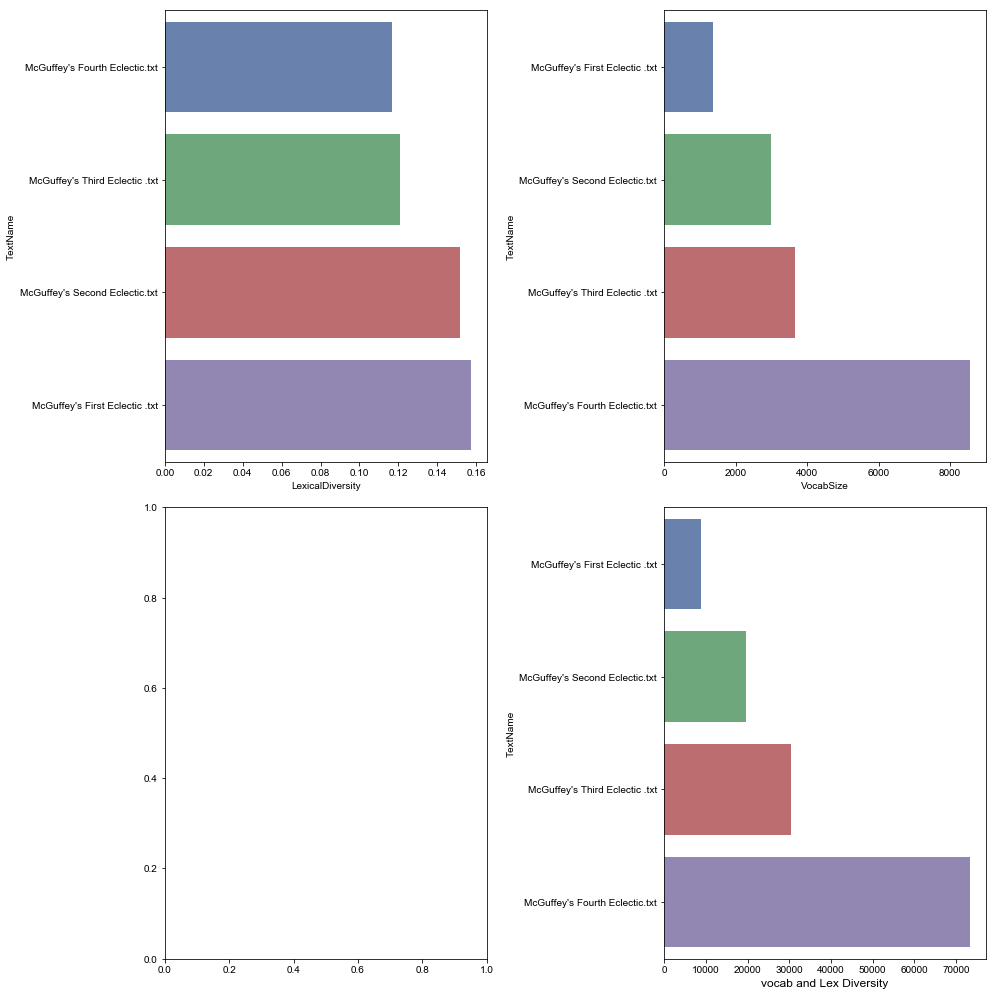

In [11]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*7), squeeze=False)

sns.set(style="whitegrid")
sns.barplot(x = 'LexicalDiversity', y = "TextName", data = df3, alpha=0.9,ax = axs[0][0])

sns.barplot(x = 'VocabSize', y = "TextName", data = df2, alpha=0.9,ax = axs[0][1])
#plt.xlabel('vocab size', fontsize=12)
sns.barplot(x = 'LexDivVocabCombine', y = "TextName", data = df2, alpha=0.9,ax = axs[1][1])
plt.xlabel('vocab and Lex Diversity', fontsize=12)

plt.tight_layout()    
plt.show()

## 4.	Also compare the vocabulary size of the same three texts. Explain whether the result was surprising

### <font color=blue> Q4 Answer: Vocabulary size represents the number of unique types. The table and plots above show that the vocabulary size of the chosen texts range from 1377 to 3674 (dynamic range of 600%). The table and VocabSize plot show that the vocabulary size increases monotonously as the text grade level increases. Thus, this measure meets the expectation that the richness of the vocabulary should increase as the grade level of the text increase. Thus, the results support the hypothesis.</font> 


## 5.	Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.

### <font color=blue> Q5 Answer: I divided Vocabulary size of a text by lexical diversity of that text to capture both the features of reading difficulty as composite measure. Vocab size/ LexDiv ranges from 8747.59 to 73420.55 (dynamic range 850%). The bar plot for this composite measure is named "vocab and Lex Diversity" above. I grouped all the different measure bar plots together for quick and easy data visualization. This composite index increases monotonously with increasing grade level of the text thus capturing the reading difficulty level of the text succinctly with higher sensitivity than the Lexical Diversity alone. We observed that the lexical diversity measured by the formula given in NLTK the chapter 1 is not a robust measure. </font>